# 라이브러리 임포트

In [1]:
!pip install --upgrade joblib==1.1.0
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import mglearn
from sklearn.model_selection import train_test_split

In [3]:
# colab 한글 깨짐
!apt -qq -y install fonts-nanum > /dev/null

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

sns.set_theme(style="darkgrid")

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=fontpath).get_name() 
fm._rebuild()  


%config InlineBackend.figure_format = 'retina'

plt.rc('font', family=font_name)  
plt.rcParams['axes.unicode_minus'] = False

# 선형 회귀
> 변수 y의 값이 계속해서 x의 값에 의해 종속적으로 결정될 때, x를 독립변수, y를 종속변수라고 한다.

## 단순 선형 회귀 분석 (Simple Linear Regression Analysis)

> 가장 오차가 작게 표현되는 최적의 선을 찾는 것이다.

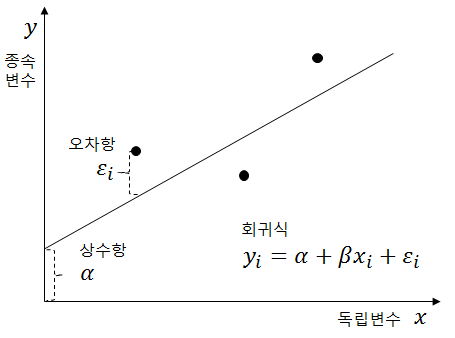

## 다중 선형 회귀 분석 (Multiple Linear Regression Analysis)

> feature가 여러 개인 경우. 다수의 요소로 y 값이 결정될 때 사용한다. 

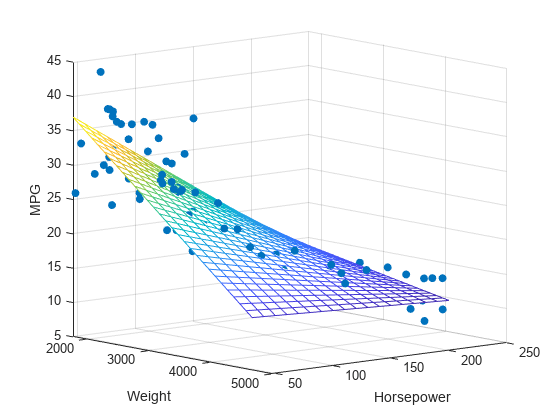

# 정규화 (Regularization)

> 오류를 최소화하기 위해 정규화를 진행한다.     
> W가 너무 최적화 되어 overfitting이 되지 않도록 noise 값을 준다.    
> L1은 noise에 절댓값을, L2는 제곱을 취한다. 

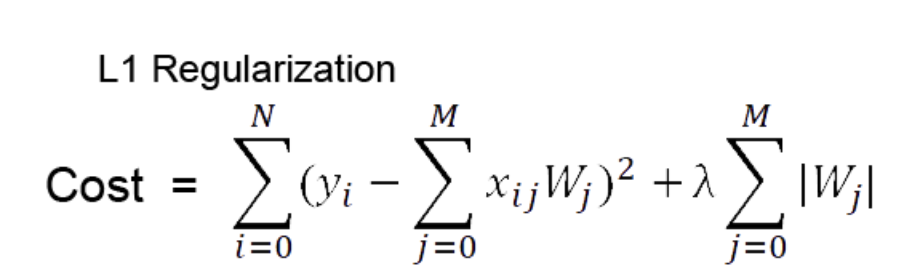

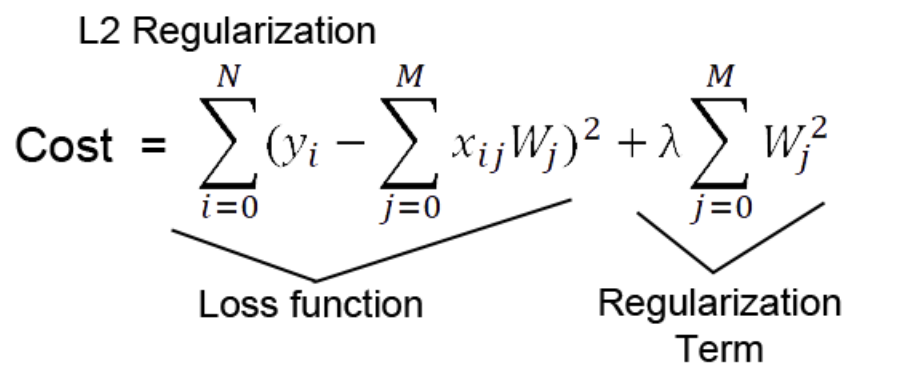

# 회귀 선형 모델

## LinearRegression
> 정규화가 없는 모델, 최소제곱법을 활용

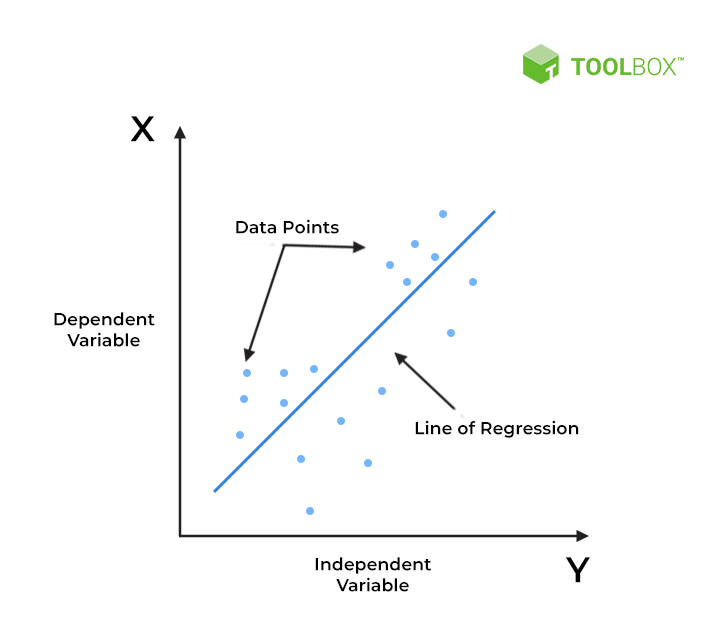

In [4]:
from sklearn.linear_model import LinearRegression

데이터 로드

In [5]:
X, y =mglearn.datasets.load_extended_boston()
print(f'{X.shape} / {y.shape}')

(506, 104) / (506,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

데이터 분리

In [6]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'X_tr.shape : {X_tr.shape}')

X_tr.shape : (379, 104)


선형 회귀 모델 정의

In [7]:
lr = LinearRegression()

모델 학습

In [8]:
lr.fit(X_tr, y_tr)

LinearRegression()

학습 결과 확인

In [9]:
# 기울기(weights)와 y절편(bias) 확인 
print(f'bias : {lr.intercept_} / weights.shape : {lr.coef_.shape} \n\n / weights : {lr.coef_}')

bias : 30.93456367364429 / weights.shape : (104,) 

 / weights : [-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871

학습한 모델을 이용한 검증 데이터 예측

In [10]:
pred = lr.predict(X_te)
pred[:5]

array([23.65294082, 26.73756431, 29.61078314, 10.15490293, 19.63821608])

In [11]:
# train과 test는 feature 개수만 같으면 된다. 
X_te.shape, X_tr.shape

((127, 104), (379, 104))

In [12]:
# test data set과 결과값의 예측 결과인 y값의 개수가 같아야 한다 
pred.shape, y_tr.shape, y_te.shape

((127,), (379,), (127,))

모델 평가
> 훈련용 평가지표는 0.95임에 비해 테스트용 평가지표가 0.61이므로 overfitting이라고 할 수 있다.     
> 두 지표의 차이가 클수록 overfitting이라고 할 수 있다.


In [13]:
# 평가 지표는 결정게수 
print(f'훈련용 평가지표 : {lr.score(X_tr, y_tr)} / 테스트용 평가지표 : {lr.score(X_te, y_te)}')

훈련용 평가지표 : 0.9520519609032728 / 테스트용 평가지표 : 0.6074721959665705


## Ridge with L2
> 선형 회귀에 L2 적용

In [14]:
from sklearn.linear_model import Ridge

In [15]:
ridge = Ridge().fit(X_tr, y_tr)

LinearRegression보다 차이가 작으므로 어느정도 정규화가 되었다는 것을 알 수 있다.      
> 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 줄 수 있다. 

In [16]:
# 평가 지표
print(f'훈련용 평가지표 : {ridge.score(X_tr, y_tr)} / 테스트용 평가지표 : {ridge.score(X_te, y_te)}')

훈련용 평가지표 : 0.8857966585170941 / 테스트용 평가지표 : 0.7527683481744751


- alpha 값을 낮추면 규제의 효과가 없어져 과대적합이 될 가능성이 있다.
- alpha 값을 높이면 훈련 세트의 성능은 나빠지지만 일반화에는 도움을 준다.

In [17]:
# overfitting은 줄어들었으나 학습의 정도가 낮다. 
ridge10 = Ridge(alpha=10).fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {ridge10.score(X_tr, y_tr)} / 테스트용 평가지표 : {ridge10.score(X_te, y_te)}')

훈련용 평가지표 : 0.7882787115369614 / 테스트용 평가지표 : 0.6359411489177309


In [18]:
# overfittting은 늘어났으나 테스트 평가 지표가 높다. 
ridge01 = Ridge(alpha=0.1).fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {ridge01.score(X_tr, y_tr)}/ 테스트용 평가지표 : {ridge01.score(X_te, y_te)}' )

훈련용 평가지표 : 0.928227368500199/ 테스트용 평가지표 : 0.7722067936479818


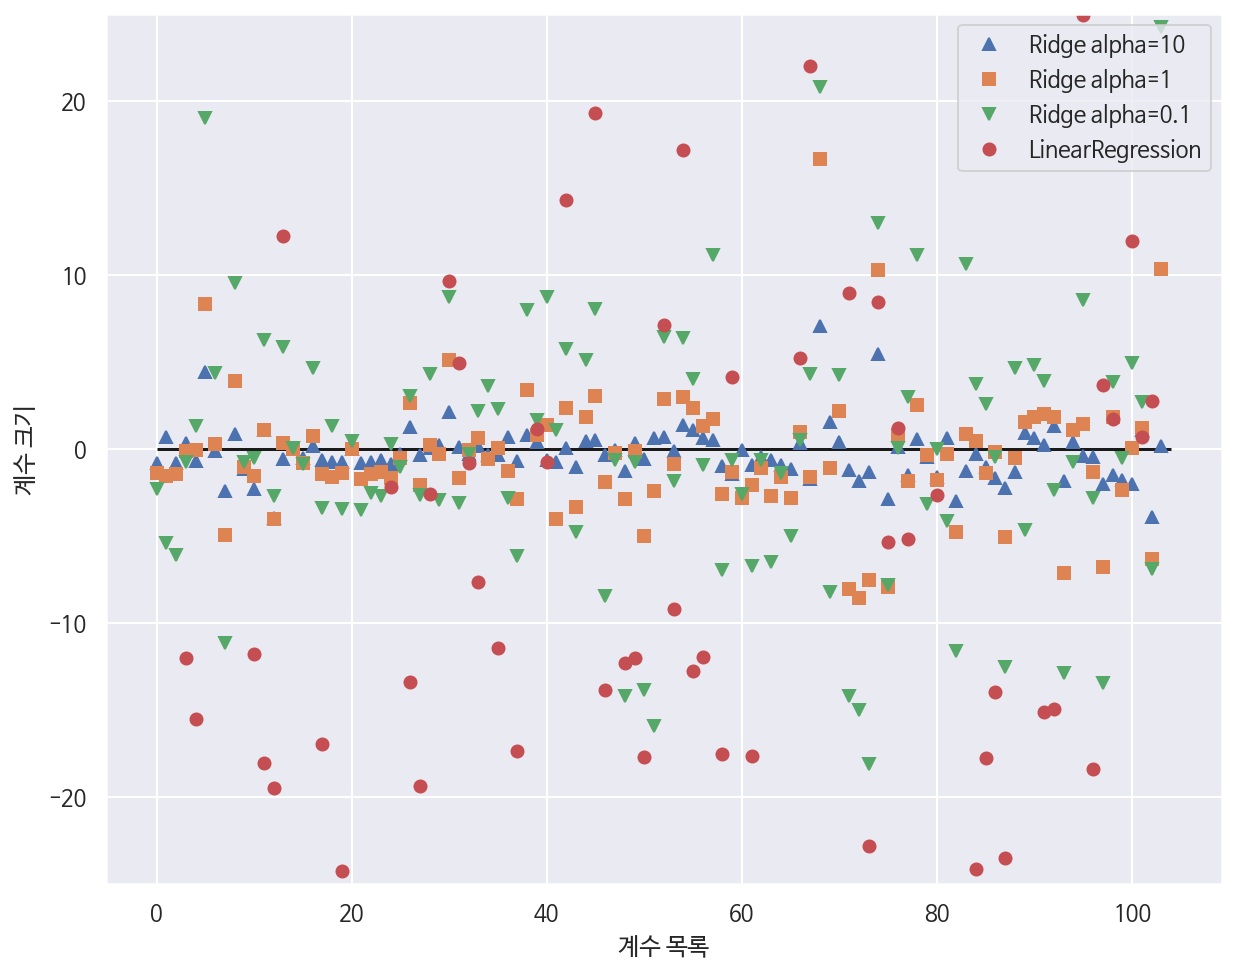

In [20]:
# 계수가 0에 수렴하는 것이 많을수록 학습이 덜 되었다. 

plt.figure(figsize=(10, 8))

plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- LinearRegression의 경우, 각 featrue들의 값이 너무 강하게 표현되었다 > overfitting      
- alpha = 0.1의 경우도 마찬가지이다.     
- alpha의 규제가 강할수록 weight 값이 0에 수렴하는 것으로 보아 각 feature들의 값에 개성이 줄어들었다는 것을 알 수 있다. > 학습의 정도가 낮다.


## Lasso with L1
> 일부 feature들의 계수를 극단적으로 줄인다.    
> 모델에서 완전히 제외되는 특성이 생긴다. 

In [21]:
from sklearn.linear_model import Lasso

In [24]:
lasso = Lasso().fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {lasso.score(X_tr, y_tr)} / 테스트용 평가지표 : {lasso.score(X_te, y_te)}')
print('-' * 100)
print(f'사용한 특성의 수 : {np.sum(lasso.coef_ != 0)} / 전체 측정 수 : {X_tr.shape[1]}')

훈련용 평가지표 : 0.29323768991114607 / 테스트용 평가지표 : 0.20937503255272294
----------------------------------------------------------------------------------------------------
사용한 특성의 수 : 4 / 전체 측정 수 : 104


In [25]:
# alpha 값을 변경할 때는 max_iter를 증가시켜야 한다. 
lasso01 = Lasso(alpha=0.01, max_iter=100000).fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {lasso01.score(X_tr, y_tr)} / 테스트용 평가지표 : {lasso01.score(X_te, y_te)}')
print('-' * 100)
print(f'사용한 특성의 수 : {np.sum(lasso01.coef_ !=0)} / 전체 측정 수  : {X_tr.shape[1]}')

훈련용 평가지표 : 0.8962226511086497 / 테스트용 평가지표 : 0.7656571174549982
----------------------------------------------------------------------------------------------------
사용한 특성의 수 : 33 / 전체 측정 수  : 104


In [29]:
# 규제를 완화했더니 학습은 더 잘 되었지만 지표간 차이를 통해 overefitting이 발생했다는 것을 알 수 있다. 
lasso00001 = Lasso(alpha=0.0001, max_iter=10000000).fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {lasso00001.score(X_tr, y_tr)} / 테스트용 평가지표 : {lasso00001.score(X_te, y_te)}')
print('-' * 100)
print(f'사용한 특성의 수 : {np.sum(lasso00001.coef_ != 0)} / 전체 특성 수 : {X_tr.shape[1]}')

훈련용 평가지표 : 0.9507158754515463 / 테스트용 평가지표 : 0.6437467421272821
----------------------------------------------------------------------------------------------------
사용한 특성의 수 : 96 / 전체 특성 수 : 104


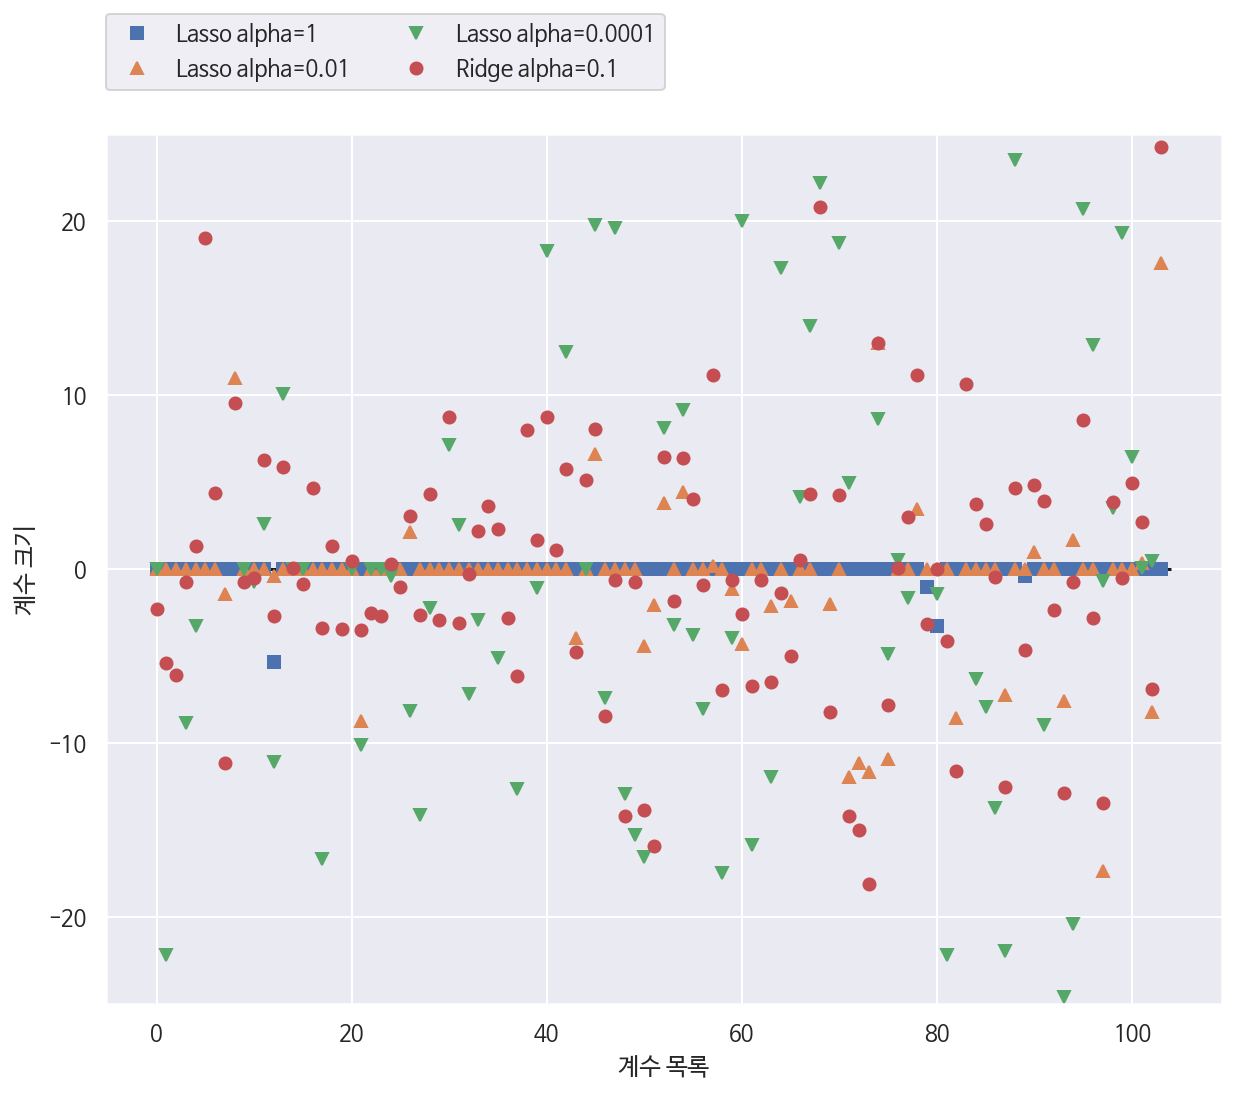

In [30]:
plt.figure(figsize=(10, 8))

plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso01.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')

plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))

## ElasticNet
> 선형회귀에 L1, L2 규제를 동시에 적용한 모델 
- l1_ratio(default=0.5)
  - 0이면 L2 규제, 1이면 L1 규제
  - 0 < l1_ratio < 1이면 혼합


In [31]:
from sklearn.linear_model import ElasticNet

In [33]:
elnet = ElasticNet().fit(X_tr, y_tr)
print(f'훈련용 평가지표 : {elnet.score(X_tr, y_tr)} / 테스트용 평가지표 : {elnet.score(X_te, y_te)}')
print('-'*100)
print(f'사용한 특성의 수 : {np.sum(elnet.coef_ != 0)} / 전체 특성 수 : {X_tr.shape[1]}')

훈련용 평가지표 : 0.32837814485847916 / 테스트용 평가지표 : 0.2217004367773664
----------------------------------------------------------------------------------------------------
사용한 특성의 수 : 38 / 전체 특성 수 : 104


In [35]:
# ratio를 조절할 수 있다. 
alpha = 0.01
ratios = [0.2, 0.5, 0.8]

for ratio in ratios :
  elnet = ElasticNet(alpha=alpha, l1_ratio = ratio, random_state=42).fit(X_tr, y_tr)
  print(f'ratio : {ratio}')
  print(f'훈련용 평가지표 : {elnet.score(X_tr, y_tr)} / 테스트용 평가지표 : {elnet.score(X_te, y_te)}')
  print(f'사용한 특성의 수 : {np.sum(elnet.coef_ != 0)} / 전체 특성 수 : {X_tr.shape[1]}')
  print('-'*100)

ratio : 0.2
훈련용 평가지표 : 0.8421033820826037 / 테스트용 평가지표 : 0.7055067157435387
사용한 특성의 수 : 93 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------
ratio : 0.5
훈련용 평가지표 : 0.8553665697077995 / 테스트용 평가지표 : 0.7209054027265394
사용한 특성의 수 : 84 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------
ratio : 0.8
훈련용 평가지표 : 0.8752442706471416 / 테스트용 평가지표 : 0.741439523522267
사용한 특성의 수 : 63 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


In [38]:
# alpha 값을 조절할 수 있다. 

alphas = [1, 0.1, 0.01, 0.001, 0.0001]
ratio = 0.8

for alpha in alphas :
  elnet = ElasticNet(alpha=alpha, l1_ratio=ratio, random_state=42).fit(X_tr, y_tr)
  print(f'alpha : {alpha}')
  print(f'훈련용 평가지표 : {elnet.score(X_tr, y_tr)} / 테스트용 평가지표 : {elnet.score(X_te, y_te)}')
  print(f'사용한 특성의 수 : {np.sum(elnet.coef_ != 0)} / 전체 특성 수 : {X_tr.shape[1]}')
  print('-'*100)

alpha : 1
훈련용 평가지표 : 0.27095548763124777 / 테스트용 평가지표 : 0.1850379025908493
사용한 특성의 수 : 18 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------
alpha : 0.1
훈련용 평가지표 : 0.7399596108844948 / 테스트용 평가지표 : 0.5768205411208096
사용한 특성의 수 : 33 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------
alpha : 0.01
훈련용 평가지표 : 0.8752442706471416 / 테스트용 평가지표 : 0.741439523522267
사용한 특성의 수 : 63 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.280e+01, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.271e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(


alpha : 0.001
훈련용 평가지표 : 0.9271504286329 / 테스트용 평가지표 : 0.7813331506633265
사용한 특성의 수 : 91 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------
alpha : 0.0001
훈련용 평가지표 : 0.939629506379038 / 테스트용 평가지표 : 0.7065232529391537
사용한 특성의 수 : 102 / 전체 특성 수 : 104
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+03, tolerance: 3.233e+00
  model = cd_fast.enet_coordinate_descent(
